In [54]:
import seaborn as sns
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2

In [56]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [58]:
df1=pd.DataFrame(df,columns=['sex','smoker'])
df1.head(10)

,sex,smoker
0,Female,No
1,Male,No
2,Male,No
3,Male,No
4,Female,No
5,Male,No
6,Male,No
7,Male,No
8,Male,No
9,Male,No


In [60]:
df2=pd.crosstab(df1['sex'],df1['smoker'])
df2.head(10)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [62]:
df1['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

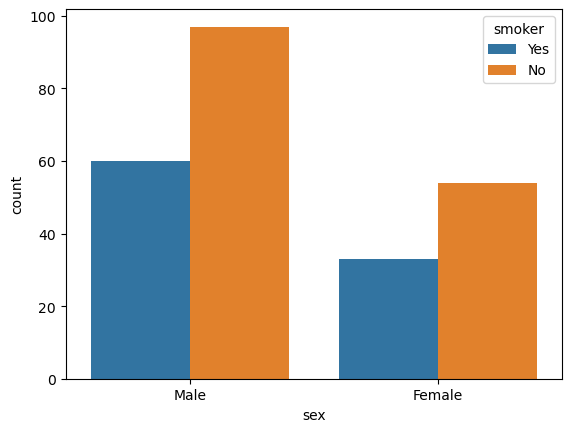

In [64]:
sns.countplot(x=df1['sex'],hue=df1['smoker'])

In [66]:
value=st.chi2_contingency(df2)
value

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [68]:
pd.DataFrame(value,columns=['st.chi2_contingency(df2)'])

,st.chi2_contingency(df2)
0,0.0
1,1.0
2,1
3,"[[59.84016393442623, 97.15983606557377], [33.1..."


In [70]:
df4=value[3]   # we need to pass the index.
df4

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [76]:
chi_2 = (df2-df4)**2/df4

In [80]:
chi_2   # value=0.00193

smoker,Yes,No
sex,,
Male,0.000427,0.000263
Female,0.000770,0.000475


In [82]:
value=0.00193

In [86]:
p_value = 1-chi2.cdf(x=value,df=1)
p_value

0.9649587947099635